NUMPY:
Usage in the project: NumPy is commonly used to handle numerical operations such as mathematical calculations, random number generation, and array manipulations during data preprocessing and feature engineering.

SCIKIT-LEARN:
Usage in the project: Scikit-learn is used to implement machine learning algorithms, split the dataset into training and test sets, train the model, and evaluate its performance.
Key modules used:

train_test_split: Splits the dataset into training and testing sets.
RandomForestRegressor: Implements the Random Forest algorithm for regression tasks (in this case, predicting insurance charges).

SEABORN:
Usage in the project: Seaborn is used to create more advanced visualizations such as correlation heatmaps, box plots, and pair plots to explore the relationships between features in the dataset.
SCIKIT-LEARN:

PANDAS:
Usage in the project: Pandas is used to load the medical insurance dataset, preprocess it, handle missing values, and perform data exploration (e.g., finding correlations, feature selection).

MATPLOTLIP.PYPLOT:
Usage in the project: It is used for visualizing relationships between features, such as plotting distributions of insurance charges, creating scatter plots of BMI vs charges, and visualizing model performance.

In [37]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as sklearn
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

In [38]:
insurance_data = pd.read_csv('insurance.csv')

In [39]:
insurance_data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [40]:
insurance_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [41]:
insurance_data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [42]:
insurance_data.shape

(1338, 7)

In [43]:
insurance_data.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

<Figure size 600x600 with 0 Axes>

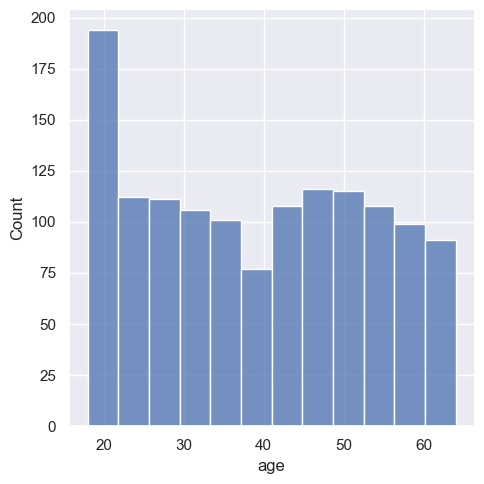

In [44]:
#Data distribution for numerical column - Age
sns.set()
plt.figure(figsize=(6,6))
sns.displot(insurance_data['age'])
plt.show()

In [45]:
insurance_data['age'].value_counts()

age
18    69
19    68
50    29
51    29
47    29
46    29
45    29
20    29
48    29
52    29
22    28
49    28
54    28
53    28
21    28
26    28
24    28
25    28
28    28
27    28
23    28
43    27
29    27
30    27
41    27
42    27
44    27
31    27
40    27
32    26
33    26
56    26
34    26
55    26
57    26
37    25
59    25
58    25
36    25
38    25
35    25
39    25
61    23
60    23
63    23
62    23
64    22
Name: count, dtype: int64

<Figure size 600x600 with 0 Axes>

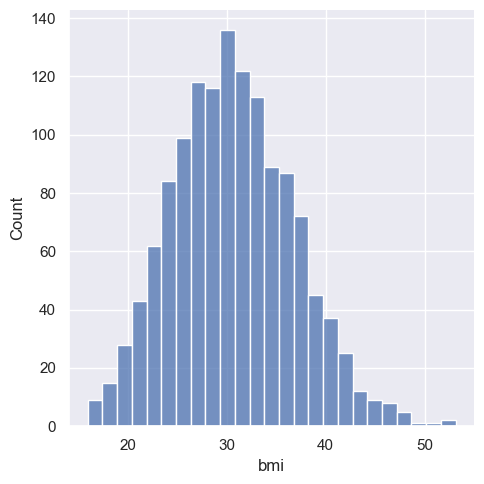

In [46]:
#Data distribution for numerical column - bmi
sns.set()
plt.figure(figsize=(6,6))
sns.displot(insurance_data['bmi'])
plt.show()

<Figure size 600x600 with 0 Axes>

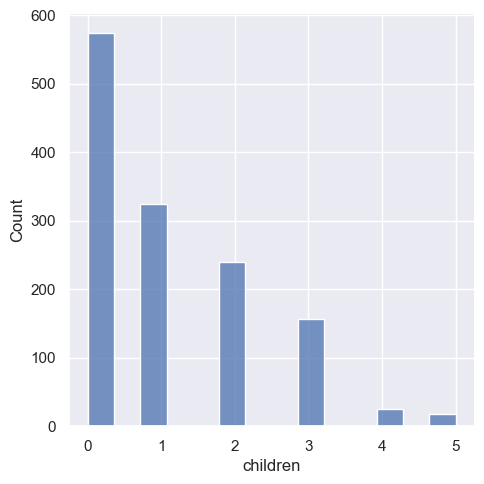

In [47]:
#Data distribution for numerical column - children
sns.set()
plt.figure(figsize=(6,6))
sns.displot(insurance_data['children'])
plt.show()

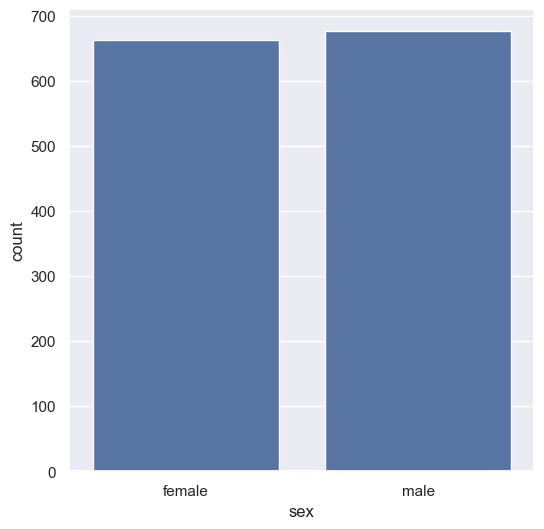

In [48]:
#Column Chart for categorical column - sex
sns.set()
plt.figure(figsize=(6,6))
sns.countplot(x= insurance_data['sex'], data=insurance_data)
plt.show()

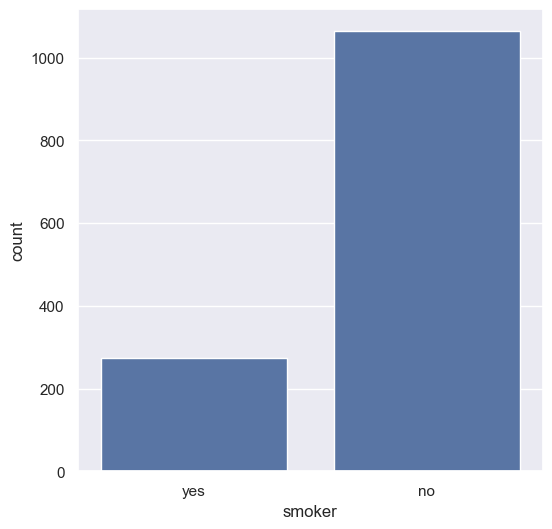

In [49]:
#Column Chart for categorical column - smoker
sns.set()
plt.figure(figsize=(6,6))
sns.countplot(x= insurance_data['smoker'], data=insurance_data)
plt.show()

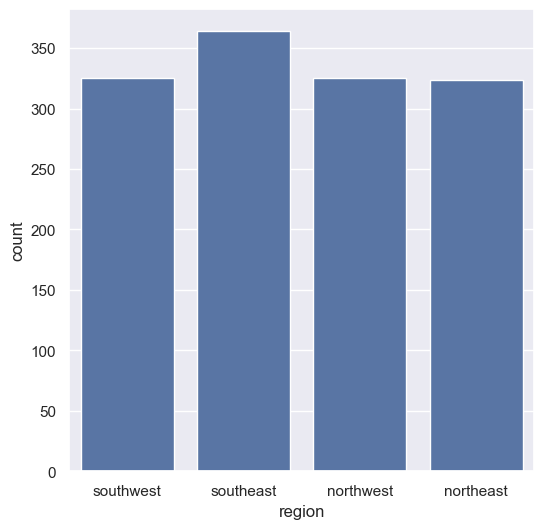

In [50]:
#Column Chart for categorical column - region
sns.set()
plt.figure(figsize=(6,6))
sns.countplot(x= insurance_data['region'], data=insurance_data)
plt.show()

In [51]:
insurance_data['region'].value_counts()

region
southeast    364
southwest    325
northwest    325
northeast    324
Name: count, dtype: int64

In [52]:
#Converting Categorical columns into Numerical Columns.

insurance_data.replace({'sex':{'female':0,'male':1}},inplace=True)

insurance_data.replace({'smoker':{'no':0,'yes':1}},inplace=True)

insurance_data.replace({'region':{'southeast':0,'southwest':1,'northeast':2,'northwest':3}},inplace=True)

In [53]:
insurance_data

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,1,16884.92400
1,18,1,33.770,1,0,0,1725.55230
2,28,1,33.000,3,0,0,4449.46200
3,33,1,22.705,0,0,3,21984.47061
4,32,1,28.880,0,0,3,3866.85520
...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,3,10600.54830
1334,18,0,31.920,0,0,2,2205.98080
1335,18,0,36.850,0,0,0,1629.83350
1336,21,0,25.800,0,0,1,2007.94500


In [54]:
input_data= insurance_data.drop(columns='charges')
output_data= insurance_data['charges']


In [55]:
input_data

,age,sex,bmi,children,smoker,region
0,19,0,27.900,0,1,1
1,18,1,33.770,1,0,0
2,28,1,33.000,3,0,0
3,33,1,22.705,0,0,3
4,32,1,28.880,0,0,3
...,...,...,...,...,...,...
1333,50,1,30.970,3,0,3
1334,18,0,31.920,0,0,2
1335,18,0,36.850,0,0,0
1336,21,0,25.800,0,0,1


In [56]:
output_data   #charges column in output data

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64

***Splitting into training and testing dataset***

In [57]:
input_train_data , input_test_data , output_train_data , output_test_data = train_test_split(input_data, output_data,test_size=0.2)

In [58]:
print(input_data.shape ,input_train_data.shape ,input_test_data.shape)

(1338, 6) (1070, 6) (268, 6)


In [59]:
print(output_data.shape ,output_train_data.shape ,output_test_data.shape)


(1338,) (1070,) (268,)


***Model Creation***

In [60]:
model= RandomForestRegressor(n_estimators=100, max_depth=7)

***Training Model***

In [61]:
model.fit(input_train_data, output_train_data)

RandomForestRegressor(max_depth=7)

***Predicting Values with Test dataset***

In [62]:
test_data_prediction = model.predict(input_test_data)

In [63]:
test_data_prediction

array([14255.72255458,  3578.86776956,  8871.24434488,  2513.24423676,
        6152.31438389, 17401.1215937 , 34256.6432978 ,  3546.06746358,
       19287.11002771, 24161.08526922,  7013.42946459,  3763.2820357 ,
       14099.66497593,  6054.73680285, 13652.12657252,  7654.19690669,
       13528.19009231,  5114.44103497, 10691.84555706, 14138.37327383,
        7916.45319148, 10240.3967312 , 10244.82572168, 11968.66004446,
        6876.52247611,  5638.87592972,  4379.49709035, 11930.45821975,
       20156.90066499,  2591.91391185, 42001.04291856,  3922.63716849,
       10062.16161035,  4088.3615172 , 14520.88841261, 17408.96305021,
        2702.7445024 , 14066.44606817, 12678.43388339,  3016.00463613,
       12955.64959381, 17287.47990502, 43277.30468808,  7009.50797031,
       39783.67952566,  6576.33576157, 20760.44100203,  6660.04373497,
        6855.22885278,  1862.24567434,  7214.41600265, 38713.71930564,
       15851.03425323,  3546.45675003, 11970.39697543, 13675.99352471,
      

***Evalutating the Model***

In [64]:
from sklearn.metrics import r2_score

In [65]:
r2_score(test_data_prediction, output_test_data)

0.8665361584823003

In [66]:
#age	sex   bmi	children	smoker	region
input_data= (23,1,35,2,0,0)
input_data_array=np.asarray(input_data) 
input_data_array= input_data_array.reshape(1,-1)

In [67]:
insurance_premium= model.predict(input_data_array)

C:\Users\priya\AppData\Roaming\Python\Python311\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


In [68]:
insurance_premium[0]

4642.846271868532

In [69]:
import pickle as pkl

In [70]:
pkl.dump(model, open('MIPML.pkl','wb'))

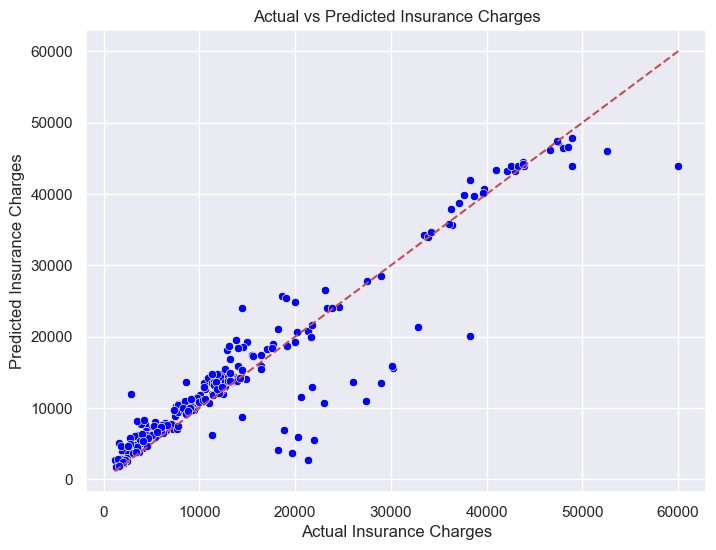

In [71]:
# Import the necessary libraries for visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Plotting Actual vs Predicted Insurance Charges
plt.figure(figsize=(8,6))
sns.scatterplot(x=output_test_data, y=test_data_prediction, color='blue')

# Plot a line for perfect prediction
plt.plot([output_test_data.min(), output_test_data.max()], [output_test_data.min(), output_test_data.max()], '--r')

# Adding labels and title
plt.xlabel('Actual Insurance Charges')
plt.ylabel('Predicted Insurance Charges')
plt.title('Actual vs Predicted Insurance Charges')
plt.grid(True)
plt.show()
